c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 413ms/step - accuracy: 0.5144 - loss: 0.6975 - val_accuracy: 0.5282 - val_loss: 0.6840
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.5524 - loss: 0.6840 - val_accuracy: 0.5756 - val_loss: 0.6728
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.5792 - loss: 0.6720 - val_accuracy: 0.5882 - val_loss: 0.6660
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - accuracy: 0.6014 - loss: 0.6630 - val_accuracy: 0.6300 - val_loss: 0.6536
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.5996 - loss: 0.6559 - val_accuracy: 0.6280 - val_loss: 0.6472
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.6171 - loss: 0.6511 - val_accuracy: 0.6366 - val_loss: 0.6432
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.6341 - loss: 0.6419 - val_accuracy: 0.6497 - val_loss: 0.6331
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.6296 - loss: 

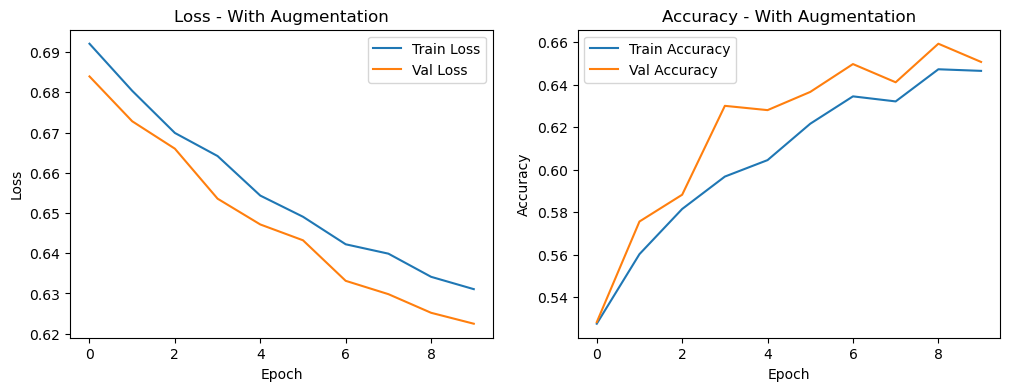

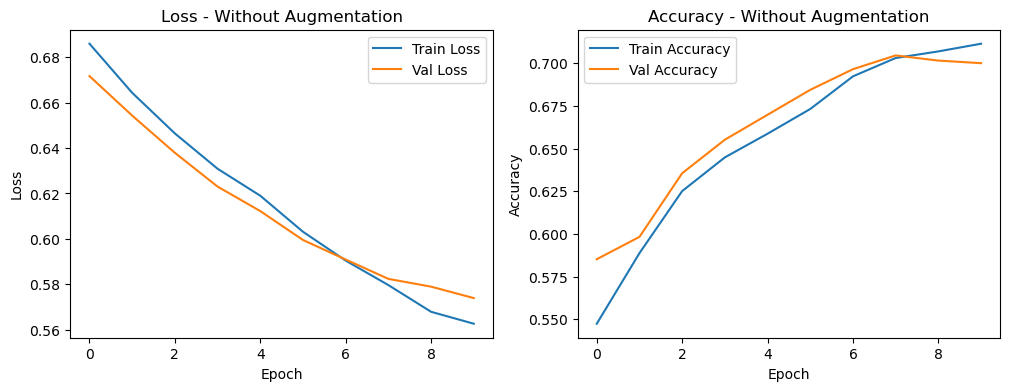

Analysis:
Data augmentation helps in reducing overfitting by providing more varied training data.
Comparing the loss and accuracy curves, we can observe the effect of augmentation on the model's performance.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

train_dir = r'C:\Users\loalo\OneDrive\training\Level_24_\dogs-vs-cats'

IMG_SIZE = 64
BATCH_SIZE = 32

augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

non_augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', strides=2, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D(pool_size=(2, 2)),s
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

augmented_model = build_model()
non_augmented_model = build_model()

augmented_train_generator = augmented_train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

augmented_validation_generator = augmented_train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

non_augmented_train_generator = non_augmented_train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

non_augmented_validation_generator = non_augmented_train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

augmented_history = augmented_model.fit(
    augmented_train_generator,
    steps_per_epoch=augmented_train_generator.samples // BATCH_SIZE,
    validation_data=augmented_validation_generator,
    validation_steps=augmented_validation_generator.samples // BATCH_SIZE,
    epochs=10
)

non_augmented_history = non_augmented_model.fit(
    non_augmented_train_generator,
    steps_per_epoch=non_augmented_train_generator.samples // BATCH_SIZE,
    validation_data=non_augmented_validation_generator,
    validation_steps=non_augmented_validation_generator.samples // BATCH_SIZE,
    epochs=10
)

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(augmented_history, 'With Augmentation')
plot_history(non_augmented_history, 'Without Augmentation')

print("Analysis:")
print("Data augmentation helps in reducing overfitting by providing more varied training data.")
print("Comparing the loss and accuracy curves, we can observe the effect of augmentation on the model's performance.")
